In [23]:
import sqlite3

# file name
file = "test2"
conn = sqlite3.connect("sample_databases/" + file + ".sql")  # Replace with your file path
cursor = conn.cursor()

# Query to get all objects (tables, indexes, views, triggers)
cursor.execute("SELECT type, name, tbl_name, sql FROM sqlite_master;")
objects = cursor.fetchall()

# Print out all the objects in the database
print("Objects in the database:")
for obj in objects:
    print(f"Type: {obj[0]}, Name: {obj[1]}, Table: {obj[2]}")
    print(f"SQL Definition: {obj[3]}\n")

# Close the connection
conn.close()

Objects in the database:
Type: table, Name: STATS_0, Table: STATS_0
SQL Definition: CREATE TABLE STATS_0 ( ComponentName TEXT NOT NULL, StatisticName TEXT NOT NULL, StatisticSubId TEXT, StatisticType TEXT NOT NULL,Sum_u64 INTEGER,SumSQ_u64 INTEGER,Count_u64 INTEGER,Min_u64 INTEGER,Max_u64 INTEGER)



In [35]:
df.isnull().sum()

ComponentName     0
StatisticName     0
StatisticSubId    0
StatisticType     0
Sum_u64           0
SumSQ_u64         0
Count_u64         0
Min_u64           0
Max_u64           0
dtype: int64

In [24]:
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("sample_databases/" + file + ".sql")

# Use pandas to read the data into a DataFrame
df = pd.read_sql_query("SELECT * FROM STATS_0;", conn)

# Close the connection
conn.close()

# Display the data in tabular form
print(df.head)  # This will print the table in a nice format
df.to_excel(file + ".xlsx", index=False)  # Saves the DataFrame to an Excel file without row numbers

    ComponentName                         StatisticName  \
0         l1cache                prefetch_opportunities   
1         l1cache                     prefetches_issued   
2         l1cache  prefetches_canceled_by_page_boundary   
3         l1cache        prefetches_canceled_by_history   
4         l1cache                     Prefetch_requests   
..            ...                                   ...   
195           cpu                                  time   
196           cpu                      cycles_hit_fence   
197           cpu                      cycles_max_issue   
198           cpu                    cycles_max_reorder   
199           cpu                                cycles   

                           StatisticSubId StatisticType   Sum_u64  \
0                  prefetch_opportunities   Accumulator     65536   
1                       prefetches_issued   Accumulator     27648   
2    prefetches_canceled_by_page_boundary   Accumulator      1194   
3          pref

In [26]:
# df statistics
print(df.describe())
print(df.info())
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.head())
print(df.tail())
print(df.sample(5))
print(df.isnull().sum())

            Sum_u64     SumSQ_u64     Count_u64       Min_u64       Max_u64
count  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02  2.000000e+02
mean   6.041689e+06  7.465980e+11  3.209636e+05  8.611732e+04  8.614276e+04
std    3.787126e+07  7.390989e+12  2.171230e+06  8.586497e+05  8.586471e+05
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.636800e+04  1.636800e+04  1.045700e+04  1.000000e+00  1.000000e+00
max    4.247190e+08  7.410090e+13  1.721638e+07  8.608188e+06  8.608188e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ComponentName   200 non-null    object
 1   StatisticName   200 non-null    object
 2   StatisticSubId  200 non-null   

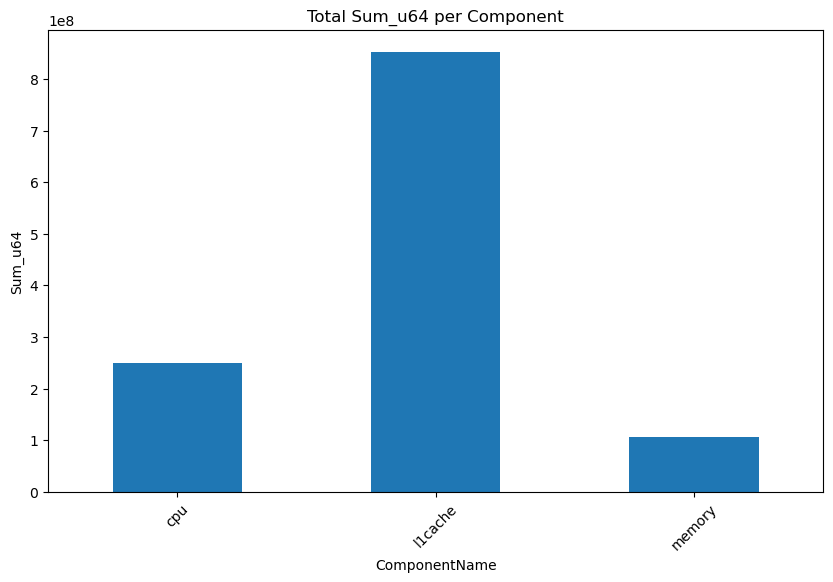

In [36]:
import matplotlib.pyplot as plt

# Group the data by ComponentName and plot the total Sum_u64
df.groupby('ComponentName')['Sum_u64'].sum().plot(kind='bar', figsize=(10, 6))

plt.title('Total Sum_u64 per Component')
plt.ylabel('Sum_u64')
plt.xticks(rotation=45)
plt.show()

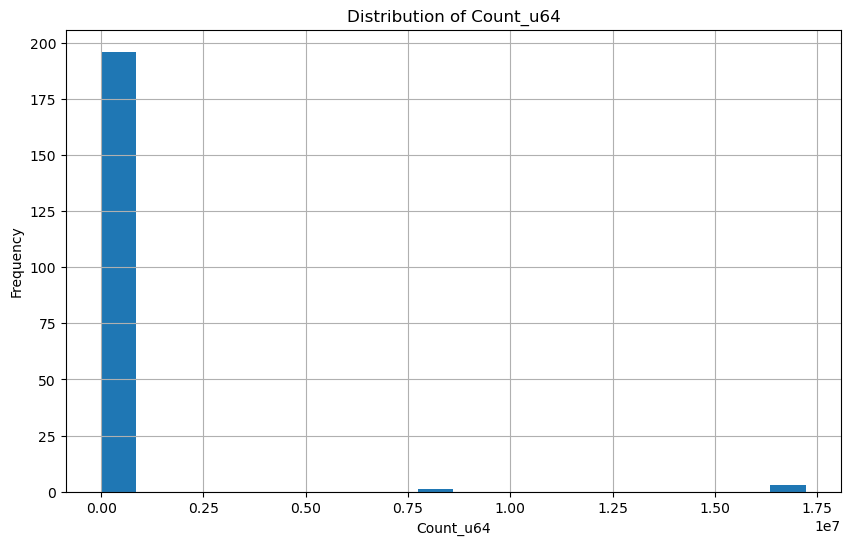

In [37]:
df['Count_u64'].hist(bins=20, figsize=(10, 6))
plt.title('Distribution of Count_u64')
plt.xlabel('Count_u64')
plt.ylabel('Frequency')
plt.show()

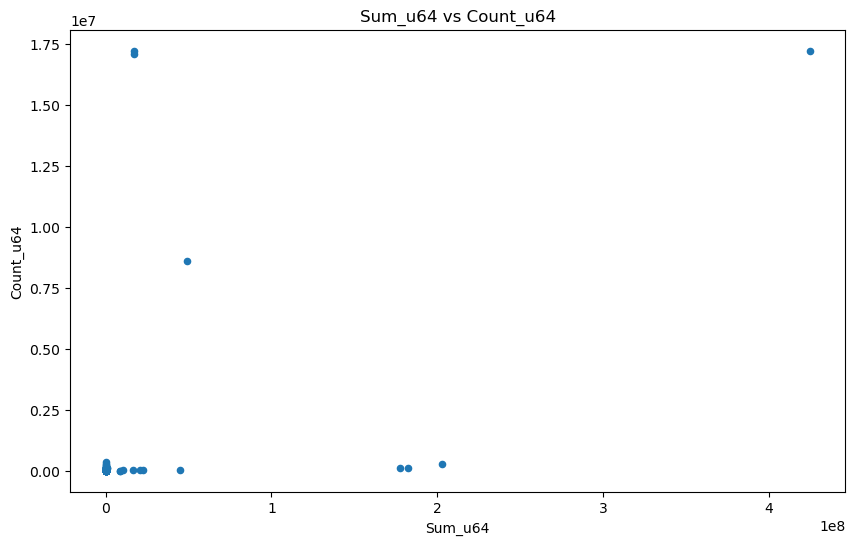

In [38]:
df.plot.scatter(x='Sum_u64', y='Count_u64', figsize=(10, 6))
plt.title('Sum_u64 vs Count_u64')
plt.xlabel('Sum_u64')
plt.ylabel('Count_u64')
plt.show()

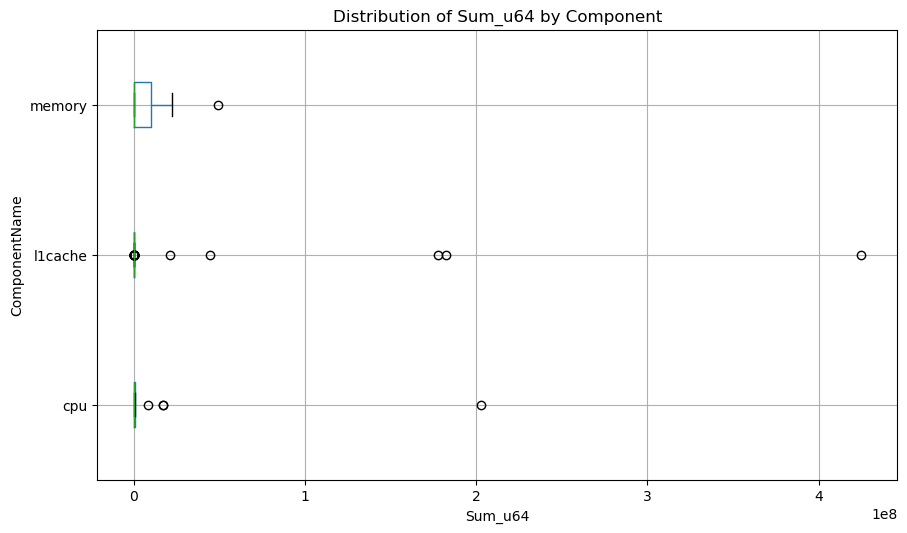

In [39]:
df.boxplot(column='Sum_u64', by='ComponentName', figsize=(10, 6), vert=False)
plt.title('Distribution of Sum_u64 by Component')
plt.suptitle('')  # Remove default title to keep it clean
plt.xlabel('Sum_u64')
plt.show()

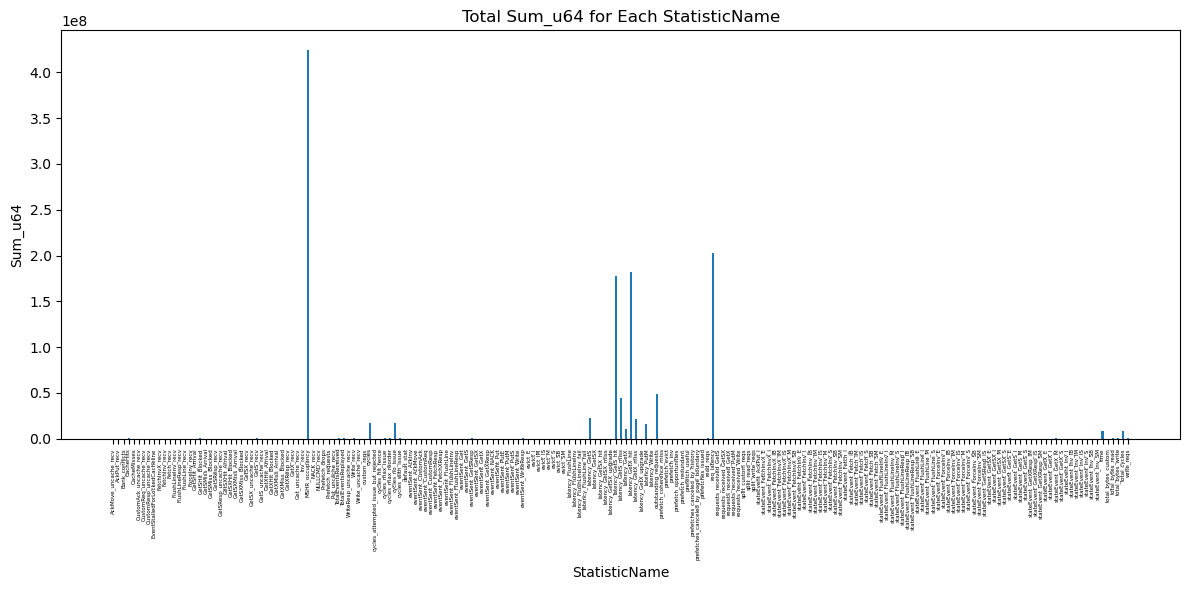

In [54]:
import numpy as np
# Step 2: Group by StatisticName and sum the Sum_u64 values
stat_sum = df.groupby('StatisticName')['Sum_u64'].sum()

# Step 3: Adjust x positions with custom spacing (e.g., increasing spacing by a factor of 2.5)
x_positions = np.arange(len(stat_sum)) * 2.5  # Multiply by 2.5 to increase spacing between bars

# Step 4: Plot the bar chart with thicker bars and spaced-out labels
plt.figure(figsize=(12,6))
plt.bar(x_positions, stat_sum.values, width=1.0)  # Increase the bar width slightly

# Step 5: Set x-ticks and labels
plt.xticks(x_positions, stat_sum.index, rotation=90, fontsize=4)  # Adjust fontsize if needed

# Step 6: Add title and labels
plt.title('Total Sum_u64 for Each StatisticName')
plt.ylabel('Sum_u64')
plt.xlabel('StatisticName')

# Adjust layout to fit the labels
plt.tight_layout()

# Step 7: Save the image with high DPI for high resolution
plt.savefig("high_res_output.png", dpi=300)  # Set DPI to 300 for high resolution

# Show the plot
plt.show()

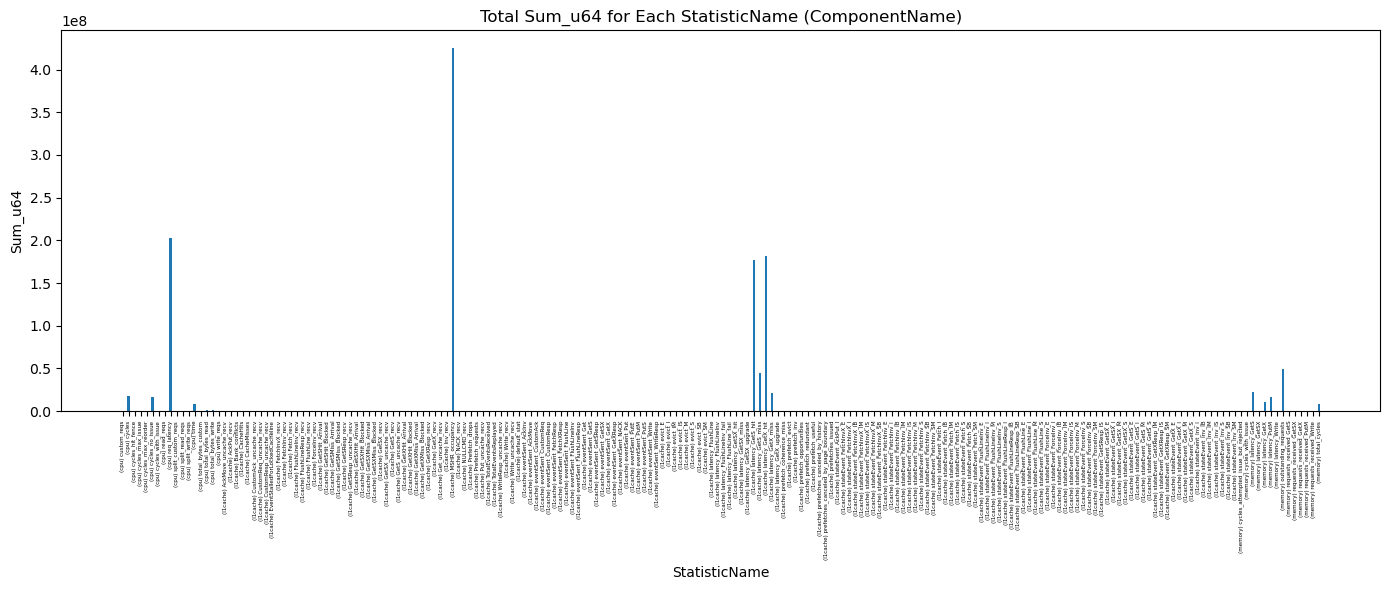

In [57]:
# Step 2: Group by both ComponentName and StatisticName and sum the Sum_u64 values
grouped = df.groupby(['ComponentName', 'StatisticName'])['Sum_u64'].sum().reset_index()

# Step 3: Create combined labels with ComponentName in parentheses
grouped['Label'] = '(' + grouped['ComponentName'] + ') ' + grouped['StatisticName']

# Step 4: Create x positions with spacing
x_positions = np.arange(len(grouped)) * 2.5  # Add space between bars

# Step 5: Plot the bar chart with thicker bars
plt.figure(figsize=(14, 6))
plt.bar(x_positions, grouped['Sum_u64'], width=1.0)

# Step 6: Set x-ticks and labels with ComponentName in parentheses
plt.xticks(x_positions, grouped['Label'], rotation=90, fontsize=4)

# Step 7: Add title and labels
plt.title('Total Sum_u64 for Each StatisticName (ComponentName)')
plt.ylabel('Sum_u64')
plt.xlabel('StatisticName')

# Adjust layout to fit the labels
plt.tight_layout()
plt.savefig("high_res_output_compname.png", dpi=300)  # Set DPI to 300 for high resolution
# Show the plot
plt.show()


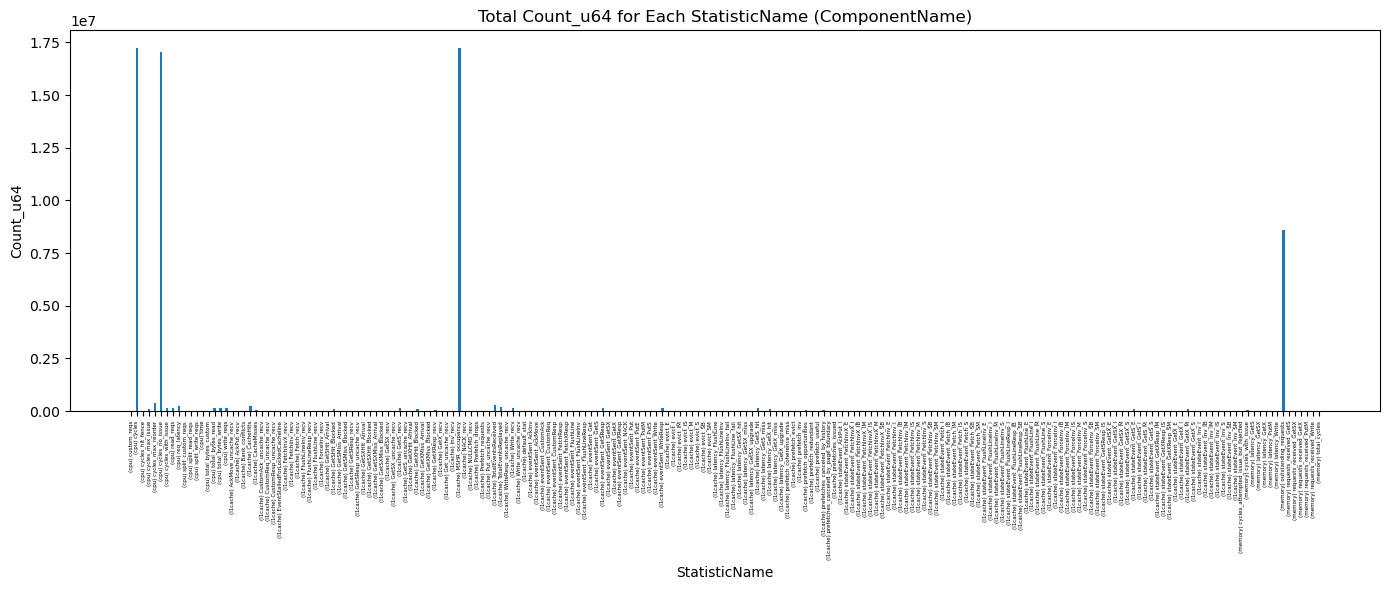

In [61]:
StatisticName = 'Count_u64' #(Sum_u64 SumSQ_u64	Count_u64 Min_u64 Max_u64)
# Step 2: Group by both ComponentName and StatisticName and sum the Sum_u64 values
grouped = df.groupby(['ComponentName', 'StatisticName'])[StatisticName].sum().reset_index()

# Step 3: Create combined labels with ComponentName in parentheses
grouped['Label'] = '(' + grouped['ComponentName'] + ') ' + grouped['StatisticName']

# Step 4: Create x positions with spacing
x_positions = np.arange(len(grouped)) * 2.5  # Add space between bars

# Step 5: Plot the bar chart with thicker bars
plt.figure(figsize=(14, 6))
plt.bar(x_positions, grouped[StatisticName], width=1.0)

# Step 6: Set x-ticks and labels with ComponentName in parentheses
plt.xticks(x_positions, grouped['Label'], rotation=90, fontsize=4)

# Step 7: Add title and labels
plt.title('Total ' + StatisticName + ' for Each StatisticName (ComponentName)')
plt.ylabel(StatisticName)
plt.xlabel('StatisticName')

# Adjust layout to fit the labels
plt.tight_layout()
figname = "high_res_output_" + StatisticName + ".png"
plt.savefig(figname, dpi=300)  # Set DPI to 300 for high resolution
# Show the plot
plt.show()

In [63]:
import ipywidgets as widgets
from IPython.display import display
# Step 2: Group by both ComponentName and StatisticName and sum the Sum_u64 values
grouped = df.groupby(['ComponentName', 'StatisticName']).agg({
    'Sum_u64': 'sum', 'SumSQ_u64': 'sum', 'Count_u64': 'sum', 'Min_u64': 'min', 'Max_u64': 'max'
}).reset_index()

# Step 3: Create combined labels with ComponentName in parentheses
grouped['Label'] = '(' + grouped['ComponentName'] + ') ' + grouped['StatisticName']

# Step 4: Define Dropdown Widgets
component_stat_dropdown = widgets.Dropdown(
    options=grouped['Label'].unique(), 
    description='Statistic:'
)

y_axis_dropdown = widgets.Dropdown(
    options=['Sum_u64', 'SumSQ_u64', 'Count_u64', 'Min_u64', 'Max_u64'],
    description='Y-Axis:'
)

# Step 5: Function to update the plot based on selections
def update_plot(component_stat, y_axis_column):
    # Filter the data based on the selected ComponentName and StatisticName
    selected_data = grouped[grouped['Label'] == component_stat]

    # Clear previous plots
    plt.figure(figsize=(6,4))
    
    # Plot the selected statistic against the chosen y-axis data
    plt.bar(selected_data['Label'], selected_data[y_axis_column])

    # Set the plot labels
    plt.ylabel(y_axis_column)
    plt.xlabel('Statistic (Component)')
    plt.title(f'{y_axis_column} for {component_stat}')

    # Display the plot
    plt.show()

# Step 6: Use an interactive display to show the dropdowns and dynamically update the plot
widgets.interact(update_plot, component_stat=component_stat_dropdown, y_axis_column=y_axis_dropdown)

interactive(children=(Dropdown(description='Statistic:', options=('(cpu) custom_reqs', '(cpu) cycles', '(cpu) …

<function __main__.update_plot(component_stat, y_axis_column)>

In [64]:
import ipywidgets as widgets
from IPython.display import display

# Step 2: Group by both ComponentName and StatisticName and sum the Sum_u64 values
grouped = df.groupby(['ComponentName', 'StatisticName']).agg({
    'Sum_u64': 'sum', 'SumSQ_u64': 'sum', 'Count_u64': 'sum', 'Min_u64': 'min', 'Max_u64': 'max'
}).reset_index()

# Step 3: Create combined labels with ComponentName in parentheses
grouped['Label'] = '(' + grouped['ComponentName'] + ') ' + grouped['StatisticName']

# Step 4: Define a Multi-Select Widget for ComponentName and StatisticName combinations
component_stat_multiselect = widgets.SelectMultiple(
    options=grouped['Label'].unique(),
    description='Statistics:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%', height='200px')  # Adjust the size of the widget
)

# Step 5: Define Dropdown Widget for y-axis selection
y_axis_dropdown = widgets.Dropdown(
    options=['Sum_u64', 'SumSQ_u64', 'Count_u64', 'Min_u64', 'Max_u64'],
    description='Y-Axis:',
    style={'description_width': 'initial'}
)

# Step 6: Function to update the plot based on selections
def update_plot(component_stat, y_axis_column):
    # Check if multiple component_stat values are selected
    if len(component_stat) == 0:
        print("Please select at least one Statistic (ComponentName) pair.")
        return

    # Filter the data based on the selected ComponentName and StatisticName
    selected_data = grouped[grouped['Label'].isin(component_stat)]

    # Clear previous plots
    plt.figure(figsize=(10, 6))
    
    # Plot the selected statistics against the chosen y-axis data
    plt.bar(selected_data['Label'], selected_data[y_axis_column])

    # Set the plot labels
    plt.ylabel(y_axis_column)
    plt.xlabel('Statistics (Component)')
    plt.title(f'{y_axis_column} for Selected Statistics')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Step 7: Use an interactive display to show the multi-select and y-axis dropdown
widgets.interact(
    update_plot, 
    component_stat=component_stat_multiselect, 
    y_axis_column=y_axis_dropdown
)

interactive(children=(SelectMultiple(description='Statistics:', layout=Layout(height='200px', width='50%'), op…

<function __main__.update_plot(component_stat, y_axis_column)>